# All the results and visualizations for the Sampta Paper

In [1]:
#Import everything
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Helpers.regression_helpers import *

## Checking if we have our data run

### Regression

In [2]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/GRAE_Data")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)

File Length: 3095


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE,Parameter STD
458,SPUD,iris,turn,0.3,"{'knn': 10, 'OD_method': 'default', 'agg_metho...","{'42': 0.7933333333333333, '1738': 0.793333333...","{'42': 0.00017777777777777779, '1738': 0.00017...","{'42': 0.8916666666666667, '1738': 0.891666666...","{'42': 0.9333333333333333, '1738': 0.866666666...","{'42': 0.9333333333333333, '1738': 0.9, '5271'...","{'42': 0.9333333333333333, '1738': 0.9, '5271'...","{'42': 0.8666666666666667, '1738': 0.9, '5271'...","{'42': 0.9333333333333333, '1738': 0.900956140...","{'42': 0.8666666666666667, '1738': 0.897783461...","{'42': 0.9333333333333333, '1738': 0.866106442...","{'42': 0.9333333333333333, '1738': 0.897783461...","{'42': {'RF-OOB': 0.9166666666666666, 'KNN_A':...","{'knn': 0.11695645204123657, 'OD_method': 0.07..."
1771,SSMA,ecoli_5,even,0.3,"{'knn': 16, 'Uincluded': True, 'Dincluded': Fa...",{'42': 0.571764705882353},{'42': 0.3707681660899654},{'42': 0.586764705882353},{'42': 0.6470588235294118},{'42': 0.5529411764705883},{'42': 0.6470588235294118},{'42': 0.611764705882353},{'42': 0.5861793260993718},{'42': 0.5904837686151173},{'42': 0.6381175872332151},{'42': 0.5523423635188341},"{'42': {'RF-OOB': 0.5974930362116991, 'KNN_A':...",{}
547,JLMA,CommunityCrime,distort,0.3,"{'knn': 362, 'normalized_laplacian': True, 'd'...","{'42': 0.7442364491989715, '1738': 0.736669476...","{'42': 2.2132596384942188e-05, '1738': 2.28871...","{'42': 0.68506125716379, '1738': 0.67398035188...","{'42': 0.5954609158708817, '1738': 0.645326600...","{'42': 0.599879612324681, '1738': 0.6499449362...","{'42': 0.6102561843587075, '1738': 0.627822613...","{'42': 0.6032518136233593, '1738': 0.626247062...","{'42': 0.5864220789767486, '1738': 0.608415109...","{'42': 0.5916681235288185, '1738': 0.609701562...","{'42': 0.5974491401011012, '1738': 0.593935533...","{'42': 0.5941772746143366, '1738': 0.590055934...","{'42': {'RF-OOB': 0.6847878258926047, 'KNN_A':...",{}
1526,RF-MASH,CommunityCrime,random,0.3,"{'knn': 2, 'page_rank': 'off-diagonal', 'DTM':...","{'42': 0.5804150213254586, '1738': 0.592042380...","{'42': 0.011423563569343941, '1738': 0.0114235...","{'42': 0.6673794113898546, '1738': 0.651475204...","{'42': 0.532795755982373, '1738': 0.5582090481...","{'42': 0.5385630184496606, '1738': 0.564837360...","{'42': 0.5068100321438949, '1738': 0.504633930...","{'42': 0.5719791859278398, '1738': 0.587078954...","{'42': 0.6596716402998274, '1738': 0.701920826...","{'42': 0.6145442241702459, '1738': 0.640853129...","{'42': 0.6420577411615146, '1738': 0.662877699...","{'42': 0.6380825910832195, '1738': 0.657886237...","{'42': {'RF-OOB': 0.6629130281378632, 'KNN_A':...","{'connection_limit': 0.002697502665548156, 'th..."
2144,MASH,diabetes,distort,0.3,"{'knn': 2, 'page_rank': 'full', 'DTM': 'log', ...","{'42': 0.78515625, '1738': 0.7760416666666666,...","{'42': 0.011130438910590276, '1738': 0.0111312...","{'42': 0.8013029315960912, '1738': 0.778501628...","{'42': 0.7142857142857143, '1738': 0.694805194...","{'42': 0.7402597402597403, '1738': 0.701298701...","{'42': 0.6818181818181818, '1738': 0.649350649...","{'42': 0.6428571428571429, '1738': 0.629870129...","{'42': 0.6725146198830408, '1738': 0.632964535...","{'42': 0.6299269206876574, '1738': 0.601640669...","{'42': 0.7028863432165319, '1738': 0.679391315...","{'42': 0.7317784256559766, '1738': 0.685042848...","{'42': {'RF-OOB': 0.7956026058631922, 'KNN_A':...","{'connection_limit': 0.005273686292932767, 'th..."


In [3]:
cls_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBasline.csv", index_col=0).rename(columns={'CE (4 KNN)': 'CE'})
cls_bl['csv_file'] = cls_bl['csv_file'].str.replace('.csv', '')

print(len(cls_bl))


rename_columns = ["Random Forest OOB",	"Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)",	"Random Forest (F1 score or RMSE)"]
domainA_cls = cls_bl[cls_bl['Method'] == 'Domain A Pipeline Baseline'].drop(columns=['Method']).rename(columns = {k: v for k, v in zip(rename_columns, [i + " A" for i  in rename_columns])})
domainB_cls = cls_bl[cls_bl['Method'] == 'Domain B Pipeline Baseline'].drop(columns=['Method']).rename(columns = {k: v for k, v in zip(rename_columns, [i + " B" for i  in rename_columns])})

# Aggregate rows in both domain A and B that have the same csv_file and split
domainA_cls = domainA_cls.groupby(['csv_file', 'split']).mean().reset_index()
domainB_cls = domainB_cls.groupby(['csv_file', 'split']).mean().reset_index()


# Merge the two dataframes on 'csv_file' and 'split'
cls_bl = pd.merge(domainA_cls, domainB_cls, on=['csv_file', 'split'], suffixes=('_A', '_B'))

# Average the 'CE' columns
cls_bl['CE'] = cls_bl[['CE_A', 'CE_B']].mean(axis=1)
cls_bl['Random Forest OOB'] = cls_bl[['Random Forest OOB A', 'Random Forest OOB B']].mean(axis=1)


# Drop the original 'CE_A' and 'CE_B' columns
cls_bl.drop(columns=['CE_A', 'CE_B', 'Random Forest OOB A', 'Random Forest OOB B'], inplace=True)

cls_bl["Method"] = "Baseline"

print(len(cls_bl))


# Display the merged dataframe
cls_bl.sample(5)

700
70


,csv_file,split,Random Forest Emb A,Nearest Neighbor A,Nearest Neighbor (F1 score or RMSE) A,Random Forest (F1 score or RMSE) A,Random Forest Emb B,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) B,CE,Random Forest OOB,Method
17,CommunityCrime,random,0.646435,0.578796,0.658587,0.602819,0.631403,0.576980,0.660088,0.614579,0.559628,0.613256,Baseline
55,OpticalNetwork,distort,0.973077,0.680187,0.554397,0.158637,0.910343,0.677648,0.556343,0.289700,0.782009,0.947534,Baseline
59,OpticalNetwork,turn,0.973077,0.680187,0.554397,0.158637,0.871190,0.680187,0.554397,0.349918,0.794644,0.923720,Baseline
31,ConcreteSlumpTest,even,0.318715,0.332332,0.759445,0.754698,0.334843,0.273813,0.779011,0.740928,0.282348,0.448598,Baseline
11,Automobile,even,0.820715,0.519745,0.567001,0.365112,0.813597,0.581551,0.569636,0.356993,0.667551,0.861895,Baseline


In [4]:
reg_bl = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/PipelineBaselines.csv", index_col=0).rename(columns={'CE (4 KNN)': 'CE'})
reg_bl['csv_file'] = reg_bl['csv_file'].str.replace('.csv', '')

print(len(reg_bl))


rename_columns = ["Random Forest OOB",	"Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)",	"Random Forest (F1 score or RMSE)"]
domainA_reg = reg_bl[reg_bl['Method'] == 'Domain A Pipeline Baseline'].drop(columns=['Method']).rename(columns = {k: v for k, v in zip(rename_columns, [i + " A" for i  in rename_columns])})
domainB_reg = reg_bl[reg_bl['Method'] == 'Domain B Pipeline Baseline'].drop(columns=['Method']).rename(columns = {k: v for k, v in zip(rename_columns, [i + " B" for i  in rename_columns])})

# Aggregate rows in both domain A and B that have the same csv_file and split
domainA_reg = domainA_reg.groupby(['csv_file', 'split']).mean().reset_index()
domainB_reg = domainB_reg.groupby(['csv_file', 'split']).mean().reset_index()


# Merge the two dataframes on 'csv_file' and 'split'
reg_bl = pd.merge(domainA_reg, domainB_reg, on=['csv_file', 'split'], suffixes=('_A', '_B'))

# Average the 'CE' columns
reg_bl['CE'] = reg_bl[['CE_A', 'CE_B']].mean(axis=1)
reg_bl['Random Forest OOB'] = reg_bl[['Random Forest OOB A', 'Random Forest OOB B']].mean(axis=1)


# Drop the original 'CE_A' and 'CE_B' columns
reg_bl.drop(columns=['CE_A', 'CE_B', 'Random Forest OOB A', 'Random Forest OOB B'], inplace=True)

reg_bl["Method"] = "Baseline"

print(len(reg_bl))


# Display the merged dataframe
reg_bl.sample(5)


700
70


,csv_file,split,Random Forest Emb A,Nearest Neighbor A,Nearest Neighbor (F1 score or RMSE) A,Random Forest (F1 score or RMSE) A,Random Forest Emb B,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) B,CE,Random Forest OOB,Method
61,Parkinsons,even,1.676374,1.133643,1.333351,0.815128,1.655826,1.193925,1.286274,0.840920,0.733046,0.821922,Baseline
37,EnergyEfficiency,random,1.549311,1.302139,1.059273,0.735816,1.459023,1.376150,0.970441,0.833227,0.657623,0.748181,Baseline
14,Automobile,turn,1.495393,1.169170,1.050570,0.693308,1.547614,1.169170,1.050570,0.764157,0.676934,0.800064,Baseline
32,ConcreteSlumpTest,random,0.191215,0.132948,1.697139,1.670511,1.092293,1.104295,1.196627,1.196020,0.313199,0.346003,Baseline
28,ConcreteCompressiveStrength,skewed,0.605761,0.658895,1.611035,1.631748,1.796650,1.528623,0.957666,0.625436,0.524036,0.608167,Baseline


In [5]:
proc_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])
proc_df.sample(4)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,GRAE
2733,SPUD,hepatitis,distort,0.3,"{'42': 0.7608695652173914, '1738': 0.739130434...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.7045454545454546, '1738': 0.640909090...","{'42': 0.6428571428571429, '1738': 0.678571428...","{'42': 0.5714285714285714, '1738': 0.75, '5271...","{'42': 0.6071428571428571, '1738': 0.821428571...","{'42': 0.5714285714285714, '1738': 0.785714285...","{'42': 0.6149068322981367, '1738': 0.812925170...","{'42': 0.578021978021978, '1738': 0.7714285714...","{'42': 0.6483516483516484, '1738': 0.663265306...","{'42': 0.5714285714285714, '1738': 0.738095238...","{'42': {'RF-OOB': 0.6227272727272727, 'KNN_A':..."
1184,RF-MASH-,ecoli_5,turn,0.3,"{'42': 0.9143730886850153, '1738': 0.902140672...","{'42': 0.04583415163332678, '1738': 0.04229909...","{'42': 0.9022988505747126, '1738': 0.900383141...","{'42': 0.803030303030303, '1738': 0.6818181818...","{'42': 0.8636363636363636, '1738': 0.666666666...","{'42': 0.8181818181818182, '1738': 0.863636363...","{'42': 0.8939393939393939, '1738': 0.787878787...","{'42': 0.8115127296945478, '1738': 0.863442113...","{'42': 0.8869047619047619, '1738': 0.791350904...","{'42': 0.8077123278912336, '1738': 0.681074912...","{'42': 0.8686706484576595, '1738': 0.658417508...","{'42': {'RF-OOB': 0.8831417624521073, 'KNN_A':..."
2032,NAMA,diabetes,skewed,0.3,{'42': 0.5559895833333334},{'42': 6.781684027777777e-06},{'42': 0.6710097719869706},{'42': 0.6233766233766234},{'42': 0.7727272727272727},{'42': 0.6298701298701299},{'42': 0.7207792207792207},{'42': 0.6190476190476191},{'42': 0.708567192629461},{'42': 0.6110787172011661},{'42': 0.7675419715884632},"{'42': {'RF-OOB': 0.6799674267100977, 'KNN_A':..."
1801,RF-MASH,parkinsons,random,0.3,"{'42': 0.7846153846153846, '1738': 0.810256410...","{'42': 0.07388560157790927, '1738': 0.07388560...","{'42': 0.842948717948718, '1738': 0.8173076923...","{'42': 0.8717948717948718, '1738': 0.871794871...","{'42': 0.8974358974358975, '1738': 0.897435897...","{'42': 0.9230769230769231, '1738': 0.871794871...","{'42': 0.8717948717948718, '1738': 0.948717948...","{'42': 0.9143095710259889, '1738': 0.852071005...","{'42': 0.8408274495231017, '1738': 0.946339950...","{'42': 0.8571826183766483, '1738': 0.852071005...","{'42': 0.8799396681749624, '1738': 0.892679900...","{'42': {'RF-OOB': 0.8557692307692307, 'KNN_A':..."


In [6]:
# Define the new columns to be created
new_columns = ['GRAE-RF-OOB', 'GRAE-KNN_A', 'GRAE-RF_A', 'GRAE-KNN-metric_A', 'GRAE-RF-metric_A', 
               'GRAE-KNN_B', 'GRAE-RF_B', 'GRAE-KNN-metric_B', 'GRAE-RF-metric_B']

# Initialize the new columns with empty dictionaries
for col in new_columns:
    proc_df[col] = [{} for _ in range(len(proc_df))]

# Iterate through the dataframe and populate the new columns
for idx, row in proc_df.iterrows():
    grae_data = row['GRAE']
    for seed, metrics in grae_data.items():
        for metric, value in metrics.items():
            new_col_name = f'GRAE-{metric}'
            proc_df.at[idx, new_col_name][seed] = value

# Display the updated dataframe
proc_df.head()

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,GRAE,GRAE-RF-OOB,GRAE-KNN_A,GRAE-RF_A,GRAE-KNN-metric_A,GRAE-RF-metric_A,GRAE-KNN_B,GRAE-RF_B,GRAE-KNN-metric_B,GRAE-RF-metric_B
0,MAGAN,tic-tac-toe,random,0.3,"{'42': 0.6461377870563675, '1738': 0.505219206...","{'42': 0.032831969874608284, '1738': 0.0294373...","{'42': 0.7434725848563969, '1738': 0.719973890...","{'42': 0.6510416666666666, '1738': 0.635416666...","{'42': 0.8072916666666666, '1738': 0.822916666...","{'42': 0.71875, '1738': 0.7916666666666666, '5...",...,"{'42': {'RF-OOB': 0.7486945169712794, 'KNN_A':...","{'42': 0.7486945169712794, '1738': 0.753916449...","{'42': 0.6510416666666666, '1738': 0.645833333...","{'42': 0.6354166666666666, '1738': 0.645833333...","{'42': 0.513439800210305, '1738': 0.5807867526...","{'42': 0.6056244626939958, '1738': 0.580786752...","{'42': 0.6041666666666666, '1738': 0.635416666...","{'42': 0.59375, '1738': 0.4947916666666667, '5...","{'42': 0.5645337922403004, '1738': 0.544750548...","{'42': 0.59375, '1738': 0.4987229604071845, '5..."
1,MASH-,seeds,turn,0.3,"{'42': 0.9597989949748744, '1738': 0.959798994...","{'42': 0.001616120805030176, '1738': 0.0016161...","{'42': 0.9937106918238994, '1738': 0.974842767...","{'42': 0.875, '1738': 0.9, '5271': 0.85, '9209...","{'42': 0.875, '1738': 0.9, '5271': 0.85, '9209...","{'42': 0.875, '1738': 0.9, '5271': 0.925, '920...",...,"{'42': {'RF-OOB': 0.9905660377358491, 'KNN_A':...","{'42': 0.9905660377358491, '1738': 0.990566037...","{'42': 0.85, '1738': 0.85, '5271': 0.85, '9209...","{'42': 0.925, '1738': 0.925, '5271': 0.925, '9...","{'42': 0.8521621621621623, '1738': 0.852162162...","{'42': 0.9242941176470587, '1738': 0.924294117...","{'42': 0.875, '1738': 0.875, '5271': 0.875, '9...","{'42': 0.9, '1738': 0.9, '5271': 0.9, '9209': ...","{'42': 0.8779516358463727, '1738': 0.877951635...","{'42': 0.9, '1738': 0.9, '5271': 0.9, '9209': ..."
2,SSMA,segmentation,turn,0.3,"{'42': 0.7518248175182481, '1738': 0.751824817...","{'42': 0.00807182055517076, '1738': 0.00807182...","{'42': 0.958904109589041, '1738': 0.7305936073...","{'42': 0.5636363636363636, '1738': 0.345454545...","{'42': 0.5636363636363636, '1738': 0.345454545...","{'42': 0.4909090909090909, '1738': 0.436363636...",...,"{'42': {'RF-OOB': 0.9761904761904762, 'KNN_A':...","{'42': 0.9761904761904762, '1738': 0.976190476...","{'42': 0.06976744186046512, '1738': 0.06976744...","{'42': 0.06976744186046512, '1738': 0.09302325...","{'42': 0.07998977766419628, '1738': 0.07998977...","{'42': 0.07784463598417087, '1738': 0.09588550...","{'42': 0.18604651162790697, '1738': 0.23255813...","{'42': 0.18604651162790697, '1738': 0.18604651...","{'42': 0.15834473324213405, '1738': 0.17966256...","{'42': 0.1688509848564568, '1738': 0.190518783..."
3,MALI-RF,flare1,skewed,0.3,{'42': 0.8885448916408669},{'42': 0.3288539140603284},{'42': 0.8837209302325582},{'42': 0.8769230769230769},{'42': 0.8769230769230769},{'42': 0.8769230769230769},...,"{'42': {'RF-OOB': 0.8875968992248062, 'KNN_A':...",{'42': 0.8875968992248062},{'42': 0.8769230769230769},{'42': 0.8769230769230769},{'42': 0.8194199243379572},{'42': 0.8194199243379572},{'42': 0.8769230769230769},{'42': 0.8769230769230769},{'42': 0.8194199243379572},{'42': 0.8194199243379572}
4,SPUD,EnergyEfficiency,skewed,0.3,{'42': 0.00984222116584943},{'42': 0.001220703125},{'42': 0.8979382921739043},{'42': 0.8636464287699965},{'42': 0.9129521179708429},{'42': 0.662233701171075},...,"{'42': {'RF-OOB': 0.8607330497803967, 'KNN_A':...",{'42': 0.8607330497803967},{'42': 0.6884842634846822},{'42': 0.7322770555158933},{'42': 0.5647395732963111},{'42': 0.5235413910628327},{'42': 0.8381564395574915},{'42': 0.8522259506588674},{'42': 0.40705766608907584},{'42': 0.3889621241697938}


In [7]:
# Explode the columns containing dictionaries
columns_to_explode = ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb A", "Nearest Neighbor A", 
                      "Nearest Neighbor (F1 score or RMSE) A", "Random Forest (F1 score or RMSE) A",
                      "Random Forest Emb B", "Nearest Neighbor B", "Nearest Neighbor (F1 score or RMSE) B", 
                      "Random Forest (F1 score or RMSE) B", 'GRAE-RF-OOB', 'GRAE-KNN_A', 'GRAE-RF_A', 'GRAE-KNN-metric_A', 'GRAE-RF-metric_A', 
                      'GRAE-KNN_B', 'GRAE-RF_B', 'GRAE-KNN-metric_B', 'GRAE-RF-metric_B']

# Create a new dataframe to store the expanded rows
expanded_rows = []

# Iterate over each row in the dataframe
for idx, row in proc_df.iterrows():
    # Get the keys (seeds) from one of the dictionary columns
    seeds = row["CE"].keys()
    
    # Iterate over each seed
    for seed in seeds:
        # Create a new row with the seed and the corresponding values from each dictionary column
        new_row = row.copy()
        new_row["seed"] = seed
        for col in columns_to_explode:
            new_row[col] = row[col][seed]
        
        # Append the new row to the list of expanded rows
        expanded_rows.append(new_row)

# Create a new dataframe from the expanded rows
proc_df = pd.DataFrame(expanded_rows)

In [8]:
proc_df["Combined_Metric"] = proc_df["CE"] - proc_df["FOSCTTM"]
proc_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,GRAE-KNN_A,GRAE-RF_A,GRAE-KNN-metric_A,GRAE-RF-metric_A,GRAE-KNN_B,GRAE-RF_B,GRAE-KNN-metric_B,GRAE-RF-metric_B,seed,Combined_Metric
1990,SPUD,ionosphere,turn,0.3,0.903134,0.000000,0.933929,0.929577,0.943662,0.845070,...,0.859155,0.943662,0.851181,0.942747,0.873239,0.943662,0.867107,0.942747,9209,0.903134
2857,RF-MASH,segmentation,skewed,0.3,0.649289,0.060230,0.851190,0.744186,0.813953,0.697674,...,0.558140,0.627907,0.539893,0.625249,0.790698,0.767442,0.776327,0.761757,42,0.589059
171,NAMA,hepatitis,random,0.3,0.572464,0.000315,0.563636,0.642857,0.535714,0.571429,...,0.535714,0.535714,0.539865,0.544700,0.571429,0.500000,0.539286,0.485380,9209,0.572149
404,MASH,diabetes,random,0.3,0.677083,0.216061,0.685668,0.681818,0.597403,0.740260,...,0.662338,0.642857,0.594238,0.638752,0.655844,0.584416,0.606679,0.582646,42,0.461022
2071,MAGAN,tic-tac-toe,even,0.3,0.491649,0.005876,0.672977,0.786458,0.625000,0.677083,...,0.671875,0.739583,0.604184,0.732740,0.645833,0.729167,0.557758,0.702049,42,0.485774


In [9]:
combined_bl_df = pd.concat([cls_bl, reg_bl])
combined_bl_df.sample(5)

,csv_file,split,Random Forest Emb A,Nearest Neighbor A,Nearest Neighbor (F1 score or RMSE) A,Random Forest (F1 score or RMSE) A,Random Forest Emb B,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) B,CE,Random Forest OOB,Method
55,OpticalNetwork,distort,0.973077,0.680187,0.554397,0.158637,0.910343,0.677648,0.556343,0.289700,0.782009,0.947534,Baseline
3,AirfoilSelfNoise,skewed,0.302174,0.122912,1.962220,1.860122,1.817207,1.368365,1.139508,0.609127,0.375783,0.515681,Baseline
40,FacebookMetrics,distort,1.919797,1.519927,0.606382,0.227784,0.754796,1.484412,0.630323,0.726299,0.758880,0.605997,Baseline
6,AutoMPG,even,0.860383,0.855412,0.389240,0.382512,0.769540,0.753619,0.508542,0.490261,0.749080,0.801977,Baseline
46,Hydrodynamics,even,-0.324078,-0.310740,2.257696,2.262340,1.973399,1.711771,0.798723,0.233466,0.292105,0.420307,Baseline


In [10]:
#Add in the baseline Results. NOTE: The baselines are aggrated across the different seeds. 
print(len(proc_df))
proc_df = pd.concat([proc_df, combined_bl_df])
len(proc_df)

10483


10623

In [11]:
# List of csv files for classification
classification_files = [
    "diabetes", "tic-tac-toe", "Medicaldataset", "hepatitis", "iris", 
    "audiology", "parkinsons", "seeds", "segmentation", "glass", 
    "heart_disease", "heart_failure", "flare1", "ecoli_5", "ionosphere", 
    "Cancer_Data", "hill_valley", "balance_scale", "treeData", "Medicaldataset", 
    "water_potability", "optdigits", "waveform", "chess", "artificial_tree", 
    "S-curve", "blobs", "zoo", "winequality-red", "car", "crx", 
    "breast_cancer", "titanic"
]

# Filter proc_df to create classification_df and regression_df
classification_df = proc_df[proc_df['csv_file'].isin(classification_files)]
regression_df = proc_df[~proc_df['csv_file'].isin(classification_files)]

# Display the first few rows of each dataframe
regression_df.head()

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,GRAE-RF_A,GRAE-KNN-metric_A,GRAE-RF-metric_A,GRAE-KNN_B,GRAE-RF_B,GRAE-KNN-metric_B,GRAE-RF-metric_B,seed,Combined_Metric,Method
4,SPUD,EnergyEfficiency,skewed,0.3,0.009842,0.001221,0.897938,0.863646,0.912952,0.662234,...,0.732277,0.564740,0.523541,0.838156,0.852226,0.407058,0.388962,42,0.008622,NaN
13,NAMA,ConcreteCompressiveStrength,skewed,0.3,-0.701496,0.002357,0.447847,0.223685,0.661386,0.207965,...,0.325828,0.862911,0.788964,0.352819,0.537845,0.773009,0.653230,42,-0.703854,NaN
17,SPUD,ConcreteSlumpTest,turn,0.3,0.626407,0.002922,0.688109,0.821330,0.653345,0.731162,...,0.778500,0.454946,0.427103,0.716418,0.709805,0.483265,0.488867,42,0.623485,NaN
17,SPUD,ConcreteSlumpTest,turn,0.3,0.626407,0.002922,0.668979,0.711931,0.616177,0.739298,...,0.778500,0.454946,0.427103,0.720533,0.704439,0.479745,0.493365,1738,0.623485,NaN
17,SPUD,ConcreteSlumpTest,turn,0.3,0.626407,0.002922,0.685517,0.687480,0.648047,0.515606,...,0.778500,0.454946,0.427103,0.721969,0.653284,0.478511,0.534358,5271,0.623485,NaN


# Visualizations

In [12]:
proc_df.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb A', 'Random Forest Emb B',
       'Nearest Neighbor A', 'Nearest Neighbor B',
       'Nearest Neighbor (F1 score or RMSE) A',
       'Nearest Neighbor (F1 score or RMSE) B',
       'Random Forest (F1 score or RMSE) A',
       'Random Forest (F1 score or RMSE) B', 'GRAE', 'GRAE-RF-OOB',
       'GRAE-KNN_A', 'GRAE-RF_A', 'GRAE-KNN-metric_A', 'GRAE-RF-metric_A',
       'GRAE-KNN_B', 'GRAE-RF_B', 'GRAE-KNN-metric_B', 'GRAE-RF-metric_B',
       'seed', 'Combined_Metric', 'Method'],
      dtype='object')

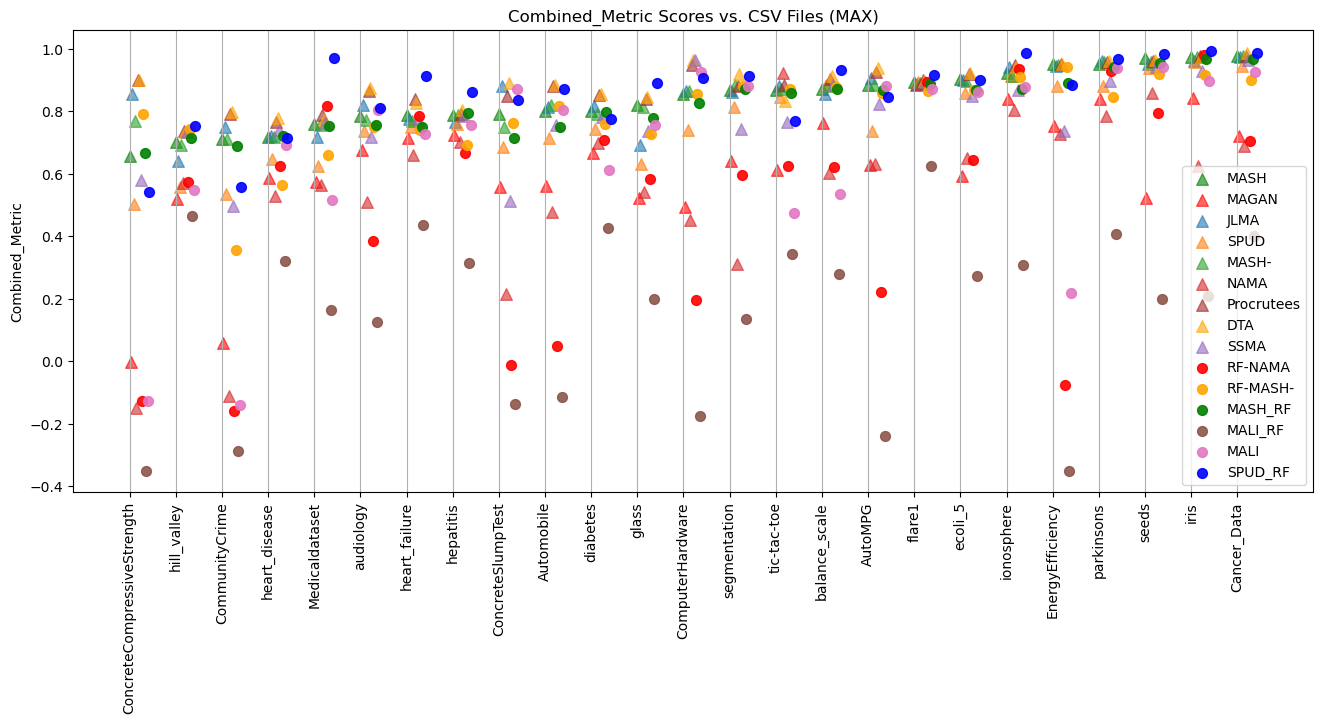

In [13]:
plt_methods_by_CSV_max(df = proc_df, metric = "Combined_Metric", return_df=False, plot_methods= ['SSMA', 'MAGAN', 'DTA', 'SPUD', 'MASH', 'MASH-', 'RF-MASH-',
       'NAMA', 'RF-NAMA', 'PCR', 'JLMA', 'MASH_RF', 'MALI_RF', 'MALI',
       'SPUD_RF', 'BL_A', 'BL_B'])

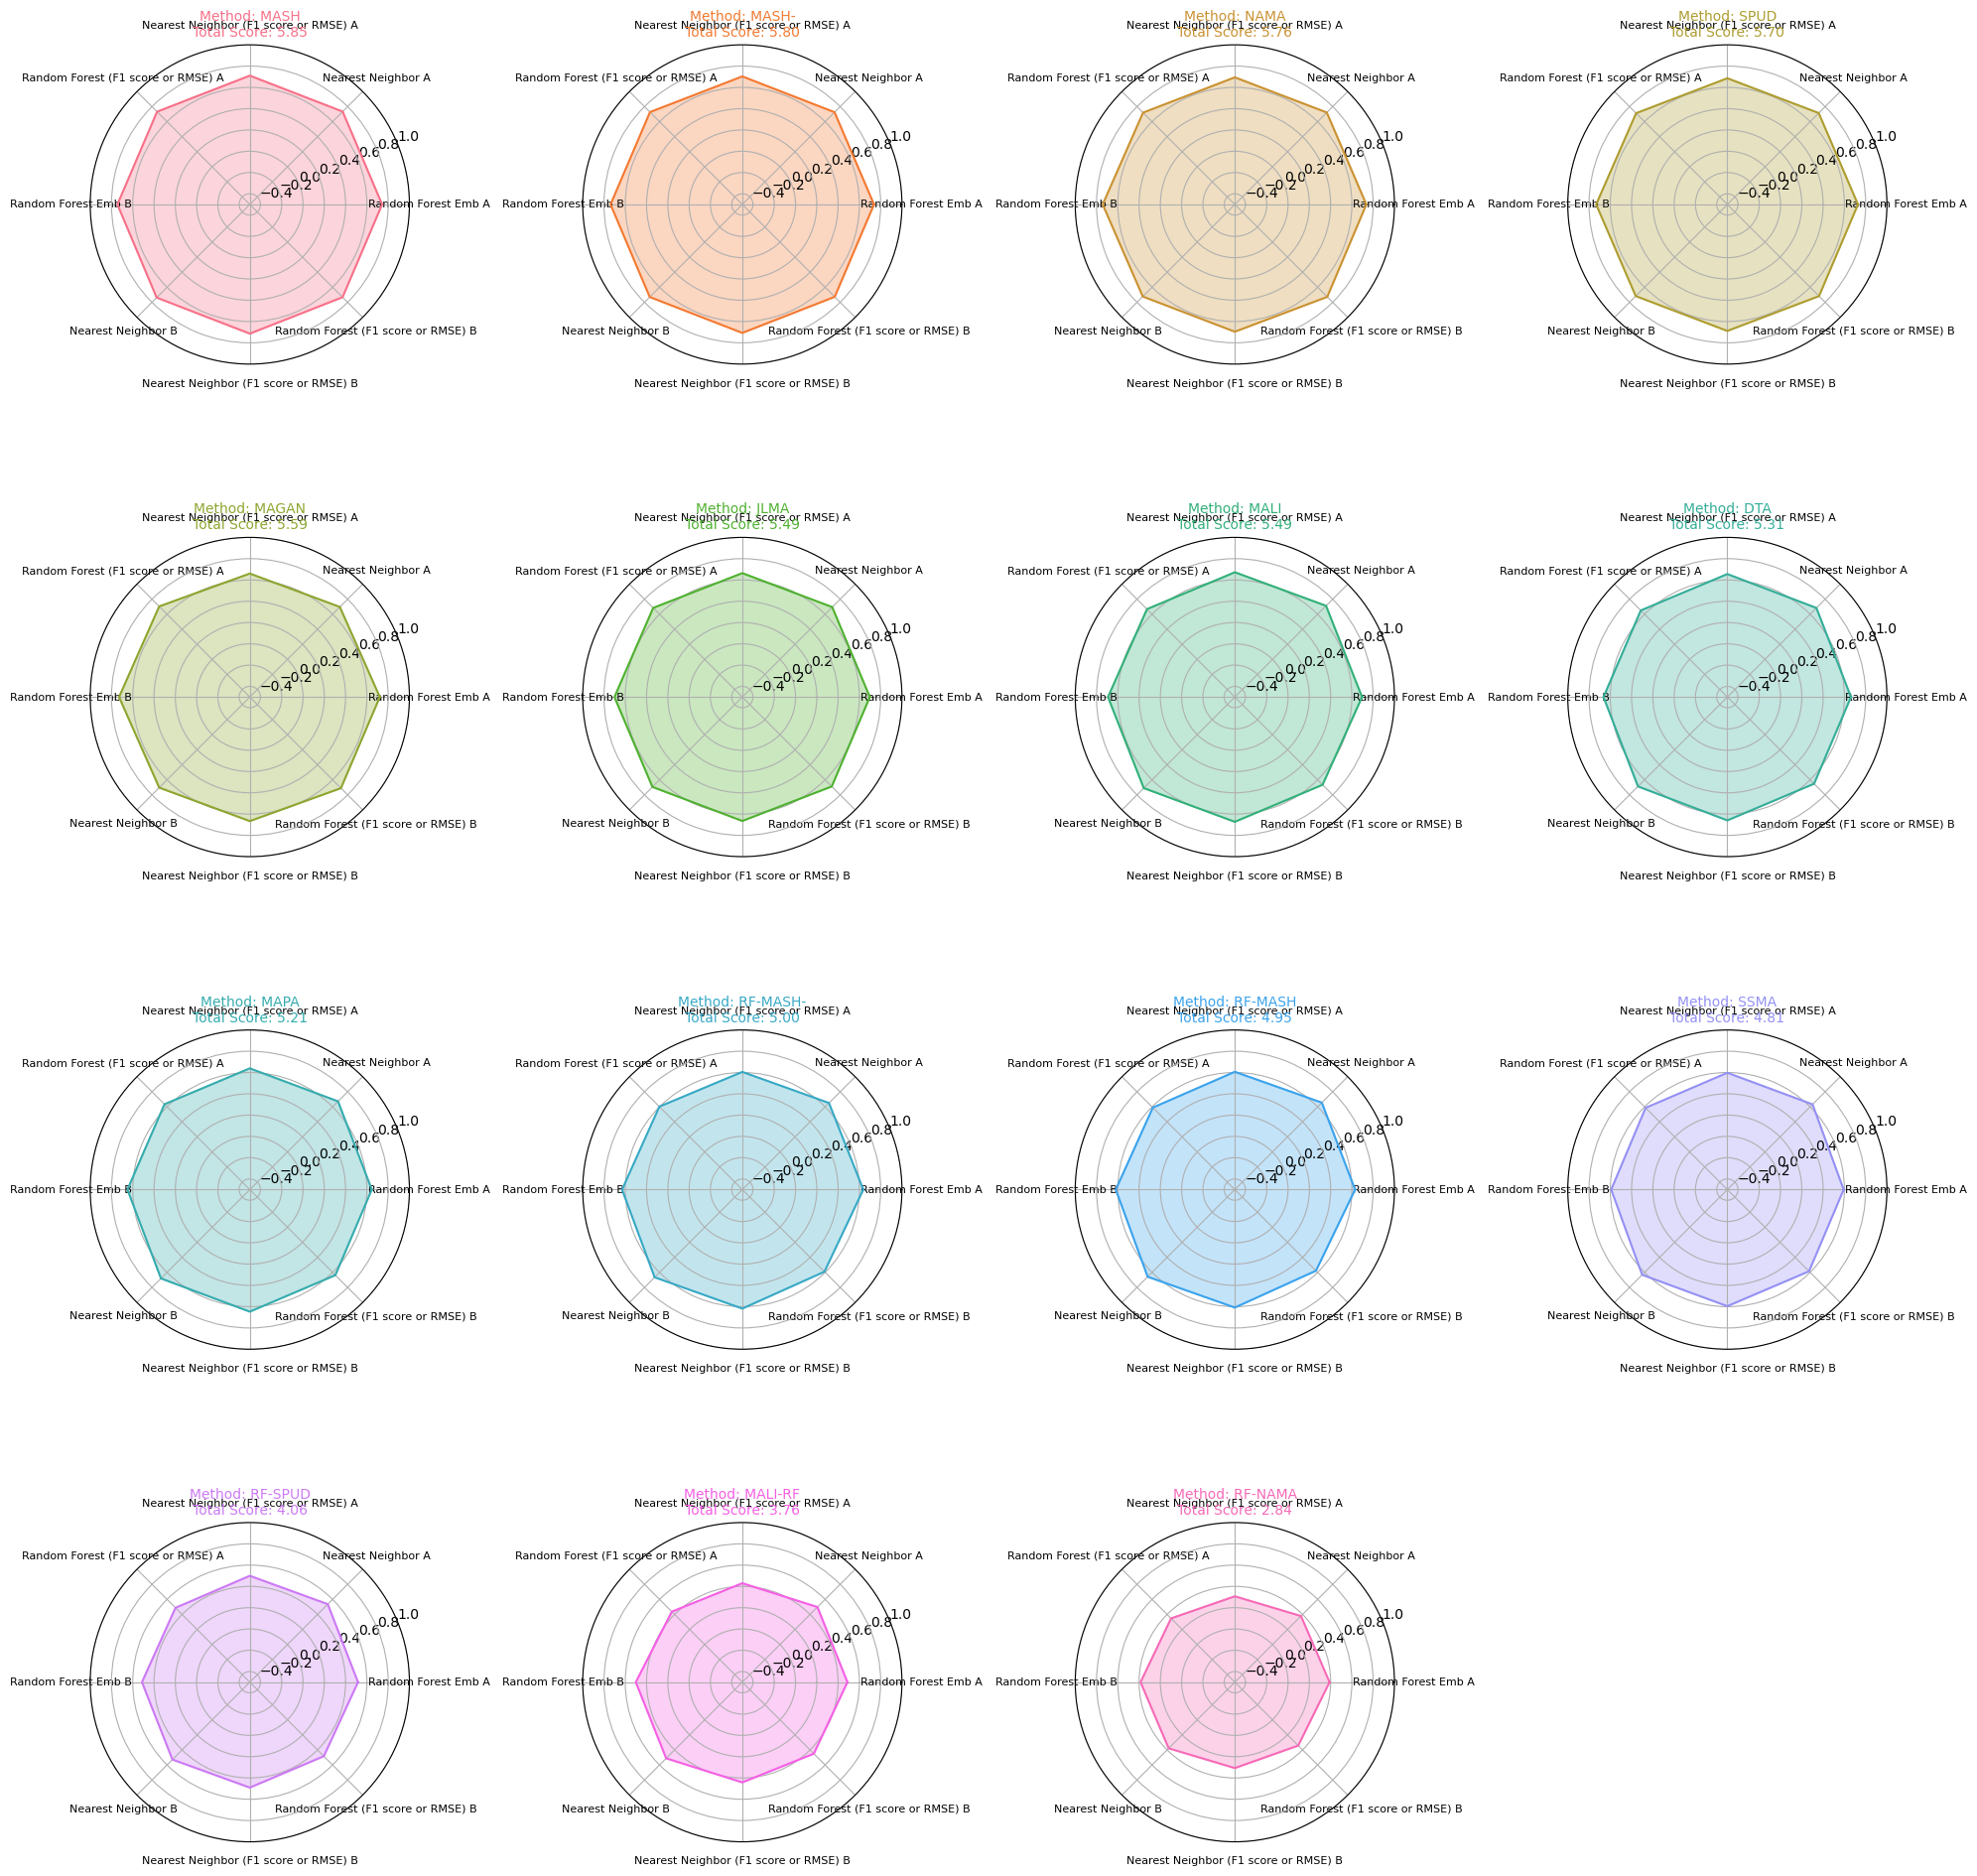

In [14]:
plot_radial(classification_df, [#'CE', 'FOSCTTM', 
                                #'Random Forest OOB', 
                                'Random Forest Emb A', 'Nearest Neighbor A', 'Nearest Neighbor (F1 score or RMSE) A', 'Random Forest (F1 score or RMSE) A',
                                'Random Forest Emb B', 'Nearest Neighbor B', 'Nearest Neighbor (F1 score or RMSE) B', 'Random Forest (F1 score or RMSE) B'])

# Helpful data frames


Baseline Scores and their meaning: (Adam doesn't think you should worry too much about these... he can work on these visualizations if they are even wanted)
- A_Classification_Score: Doesn't use an embedding at all. Is simply a KNN set to 4 which uses a train test split of 0.8 to predict on domain A.
- B_Classification_Score: Same thing as A but for B. 

Scores and their meanings
- Random Forest OOB: Is the OOB score from the RF trained against the full embedding (No training or test splits)
- Random Forest Emb A/B: The embedding is calculated with all of the points (No test or train). Then the embedding is split into a train/test. Uses data from both domains to predict points only from domain A or B using a RF algorthim (and is that score).
- Nearest Neighbor A/B: The embedding is calculated with all the points (no test or train). The embedding is then split into a train /test with equal representation from both domains. It uses all of the train data to predict on just one of the test A/B using the KNN algorithm where k = 1/30 of the dataset length. 
- NN (f1 score or RMSE): Depending on data set type, (regression or classification) its either the f1 score or RMSE. These are calculated with the same model as the Nearest Neighbor model from above. 
- RF (F1 score or RMSE): Exact same as the NN one, but using the random Forest model from above.

GRAE Scores and their meanings
- Same structure as the above scores. (The ones labeled as Metric are the F1 or RMSE scores).
- Instead of having the embedding trained on both the test and train data like the above, the embedding is only using the train data
- The Test data is then passed through GRAE networks to make the predictions. 
- This is more "Fair" and less "cheaty" than the above, because the tests points are never seen before the scoring.

In [15]:
proc_df.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb A', 'Random Forest Emb B',
       'Nearest Neighbor A', 'Nearest Neighbor B',
       'Nearest Neighbor (F1 score or RMSE) A',
       'Nearest Neighbor (F1 score or RMSE) B',
       'Random Forest (F1 score or RMSE) A',
       'Random Forest (F1 score or RMSE) B', 'GRAE', 'GRAE-RF-OOB',
       'GRAE-KNN_A', 'GRAE-RF_A', 'GRAE-KNN-metric_A', 'GRAE-RF-metric_A',
       'GRAE-KNN_B', 'GRAE-RF_B', 'GRAE-KNN-metric_B', 'GRAE-RF-metric_B',
       'seed', 'Combined_Metric', 'Method'],
      dtype='object')

In [16]:
# All the data
proc_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,GRAE-RF_A,GRAE-KNN-metric_A,GRAE-RF-metric_A,GRAE-KNN_B,GRAE-RF_B,GRAE-KNN-metric_B,GRAE-RF-metric_B,seed,Combined_Metric,Method
2131,RF-MASH-,heart_failure,distort,0.3,0.889632,0.174690,0.868201,0.266667,0.816667,0.816667,...,0.750000,0.710740,0.736801,0.666667,0.716667,0.638425,0.701708,1738,0.714942,NaN
3021,RF-NAMA,glass,turn,0.3,0.570093,0.000000,0.704678,0.325581,0.302326,0.372093,...,0.674419,0.686314,0.636648,0.744186,0.720930,0.687192,0.689147,5271,0.570093,NaN
198,SPUD,segmentation,turn,0.3,0.364929,0.000337,0.699405,0.674419,0.697674,0.627907,...,0.767442,0.637572,0.764115,0.627907,0.720930,0.612234,0.718728,42,0.364592,NaN
956,RF-MASH-,iris,random,0.3,0.520000,0.349800,0.766667,0.866667,0.500000,0.900000,...,1.000000,1.000000,1.000000,0.566667,0.500000,0.550464,0.483942,1738,0.170200,NaN
2546,SPUD,Medicaldataset,random,0.3,0.517058,0.000000,0.580569,0.587121,0.545455,0.583333,...,0.579545,0.502347,0.555868,0.621212,0.590909,0.529857,0.568831,1738,0.517058,NaN


In [17]:
classification_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,GRAE-RF_A,GRAE-KNN-metric_A,GRAE-RF-metric_A,GRAE-KNN_B,GRAE-RF_B,GRAE-KNN-metric_B,GRAE-RF-metric_B,seed,Combined_Metric,Method
1939,NAMA,balance_scale,turn,0.3,0.526400,0.000000,0.728000,0.664000,0.680000,0.584000,...,0.688000,0.664375,0.659170,0.584000,0.672000,0.555636,0.646332,42,0.526400,NaN
2595,MASH-,seeds,even,0.3,0.884422,0.042499,0.886792,0.925000,0.900000,0.900000,...,0.900000,0.950000,0.897596,0.900000,0.925000,0.901162,0.924379,42,0.841923,NaN
1684,MAGAN,iris,distort,0.3,0.280000,0.000089,0.929167,0.933333,0.900000,0.966667,...,0.966667,0.966411,0.966411,0.900000,0.866667,0.896000,0.857875,9209,0.279911,NaN
255,DTA,tic-tac-toe,distort,0.3,0.832129,0.000185,0.816767,0.642570,0.638554,0.722892,...,0.536458,0.531341,0.533899,0.697917,0.666667,0.611091,0.636447,1738,0.831943,NaN
1829,SPUD,audiology,distort,0.3,0.721053,0.000166,0.717105,0.710526,0.657895,0.631579,...,0.578947,0.487178,0.515816,0.526316,0.578947,0.468221,0.512427,1316,0.720886,NaN


In [18]:
regression_df.sample(5)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb A,Random Forest Emb B,Nearest Neighbor A,...,GRAE-RF_A,GRAE-KNN-metric_A,GRAE-RF-metric_A,GRAE-KNN_B,GRAE-RF_B,GRAE-KNN-metric_B,GRAE-RF-metric_B,seed,Combined_Metric,Method
800,MASH,ComputerHardware,distort,0.3,0.865615,0.011298,0.812209,0.708579,0.816007,0.753950,...,0.787440,0.842822,0.646786,0.639966,0.807757,0.841765,0.615098,42,0.854317,NaN
1824,MAPA,ConcreteCompressiveStrength,distort,0.3,0.771173,0.003486,0.306725,0.298203,0.208948,0.405828,...,-0.632595,1.025119,1.227754,0.344822,0.278037,0.777771,0.816450,1316,0.767686,NaN
507,SSMA,ComputerHardware,distort,0.3,0.715809,0.118258,0.472384,0.129986,0.096863,0.445589,...,-0.150175,1.493034,1.504531,0.297547,0.304551,1.175785,1.169908,9209,0.597551,NaN
1933,MAGAN,ConcreteCompressiveStrength,random,0.3,-0.249736,0.001021,0.296030,0.203138,0.333353,0.109904,...,0.087561,0.894723,0.917855,0.239155,0.076435,0.838146,0.923434,42,-0.250757,NaN
1648,RF-SPUD,CommunityCrime,random,0.3,0.492495,0.000000,0.549410,0.527458,0.505979,0.523214,...,0.571069,0.604025,0.615197,0.548820,0.474719,0.630951,0.680795,1316,0.492495,NaN


# Marshall's Visualizations

### Story number one: How close GRAE's Out of Bag Score is to the Model's

/tmp/ipykernel_1443401/3916321278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df["OOB_Difference"] = classification_df["GRAE-RF-OOB"] - classification_df["Random Forest OOB"]
/tmp/ipykernel_1443401/3916321278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classification_df.dropna(subset = ["OOB_Difference"], inplace = True)


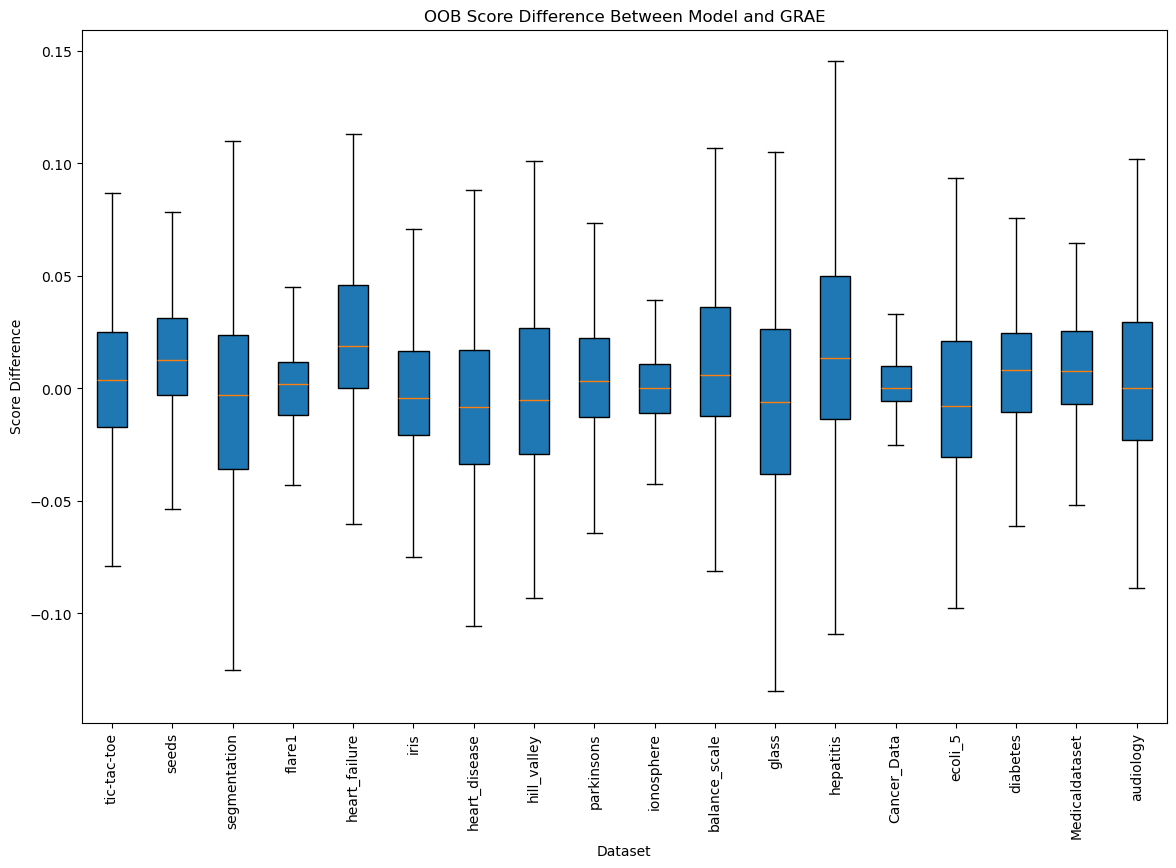

In [19]:
#create a new column tracking how much accuracy GRAE loses compared to the baseline that we can graph
classification_df["OOB_Difference"] = classification_df["GRAE-RF-OOB"] - classification_df["Random Forest OOB"]
classification_df.dropna(subset = ["OOB_Difference"], inplace = True)

csv_filenames = classification_df["csv_file"].unique()
boxplot_data = []
for csv in csv_filenames:
    csv_df = classification_df[classification_df["csv_file"] == csv]
    boxplot_data.append(csv_df["OOB_Difference"].values)

plt.figure(figsize=(14, 9))
plt.boxplot(boxplot_data, showfliers=False, patch_artist=True)
plt.xlabel("Dataset")
plt.ylabel("Score Difference")
plt.title("OOB Score Difference Between Model and GRAE")
plt.xticks(ticks=range(1, len(boxplot_data) + 1), labels=[filename for filename in csv_filenames], rotation=90)
plt.show()

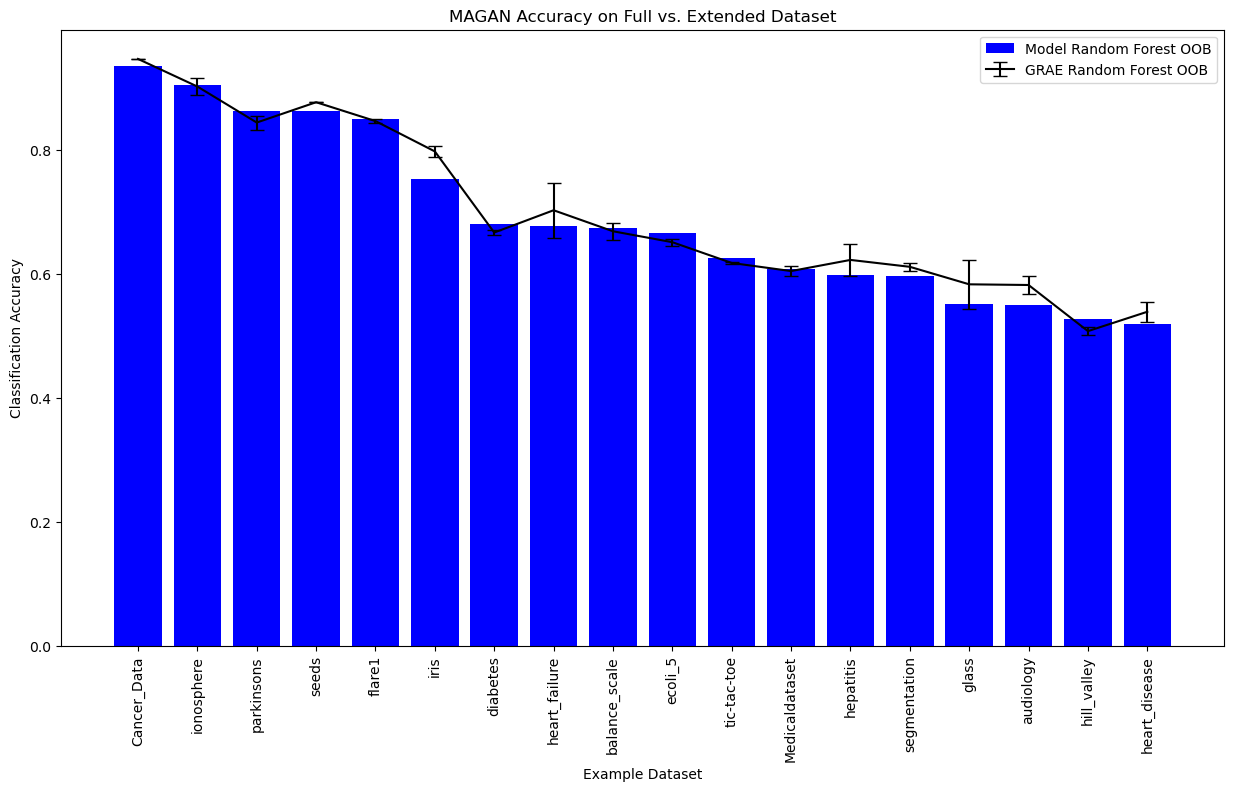

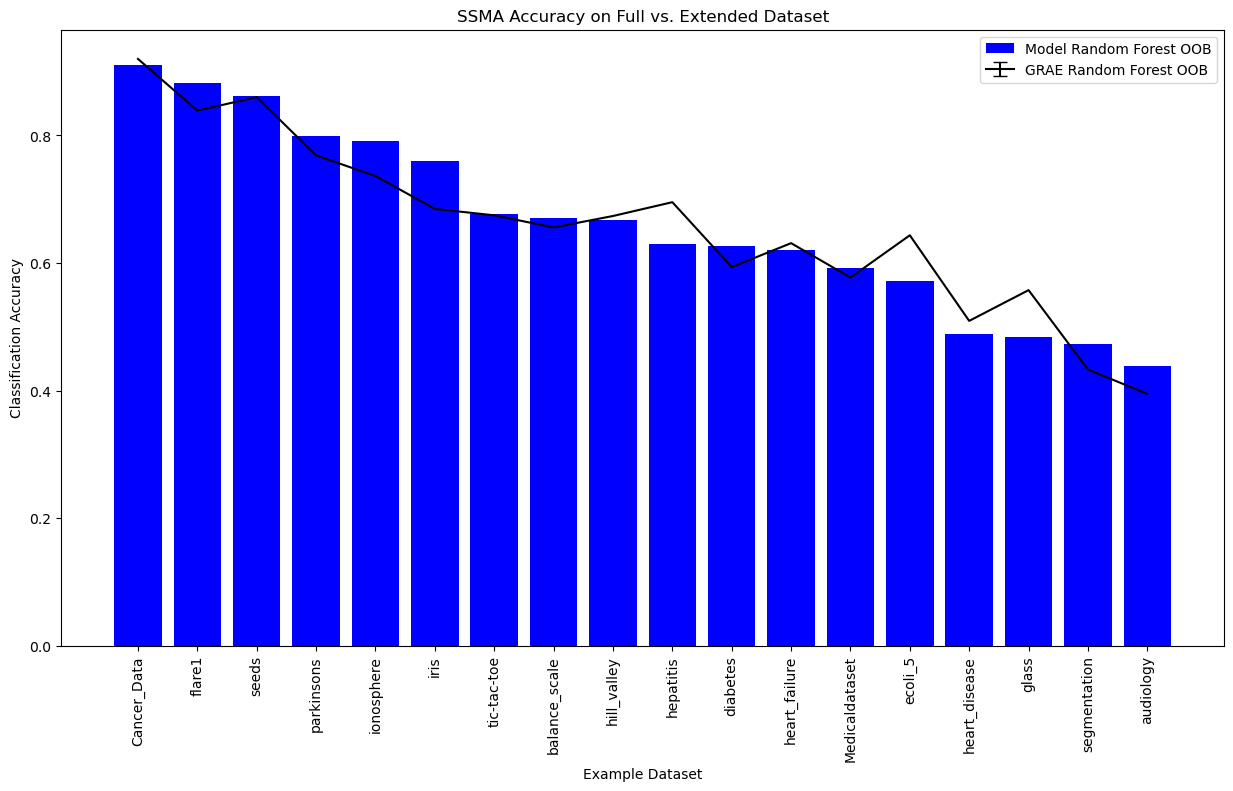

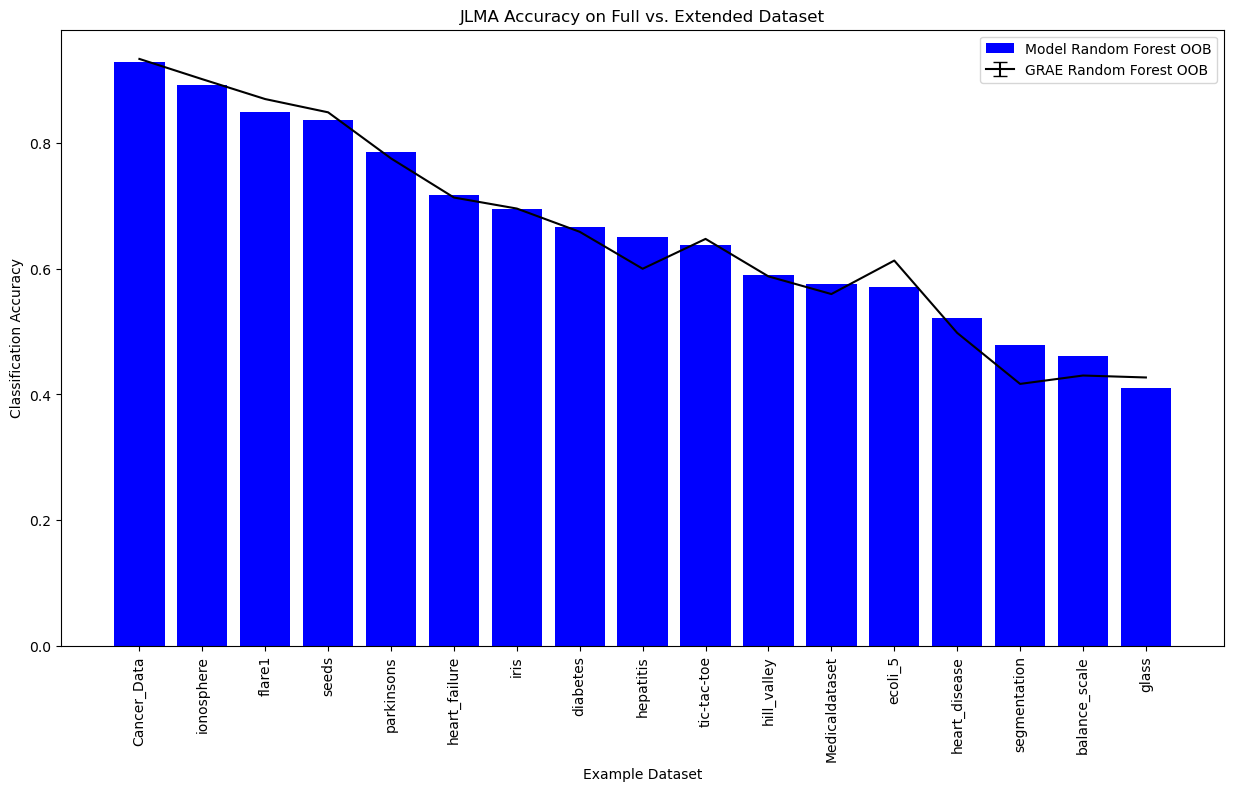

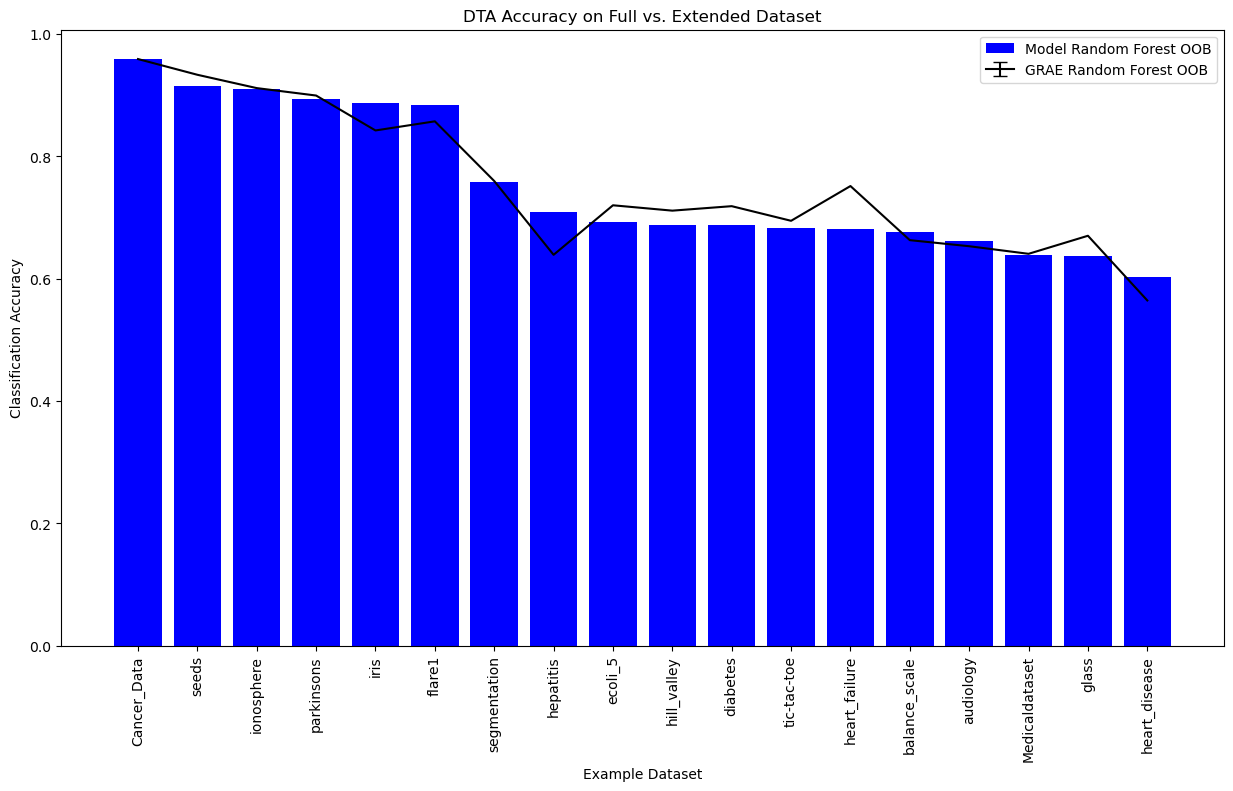

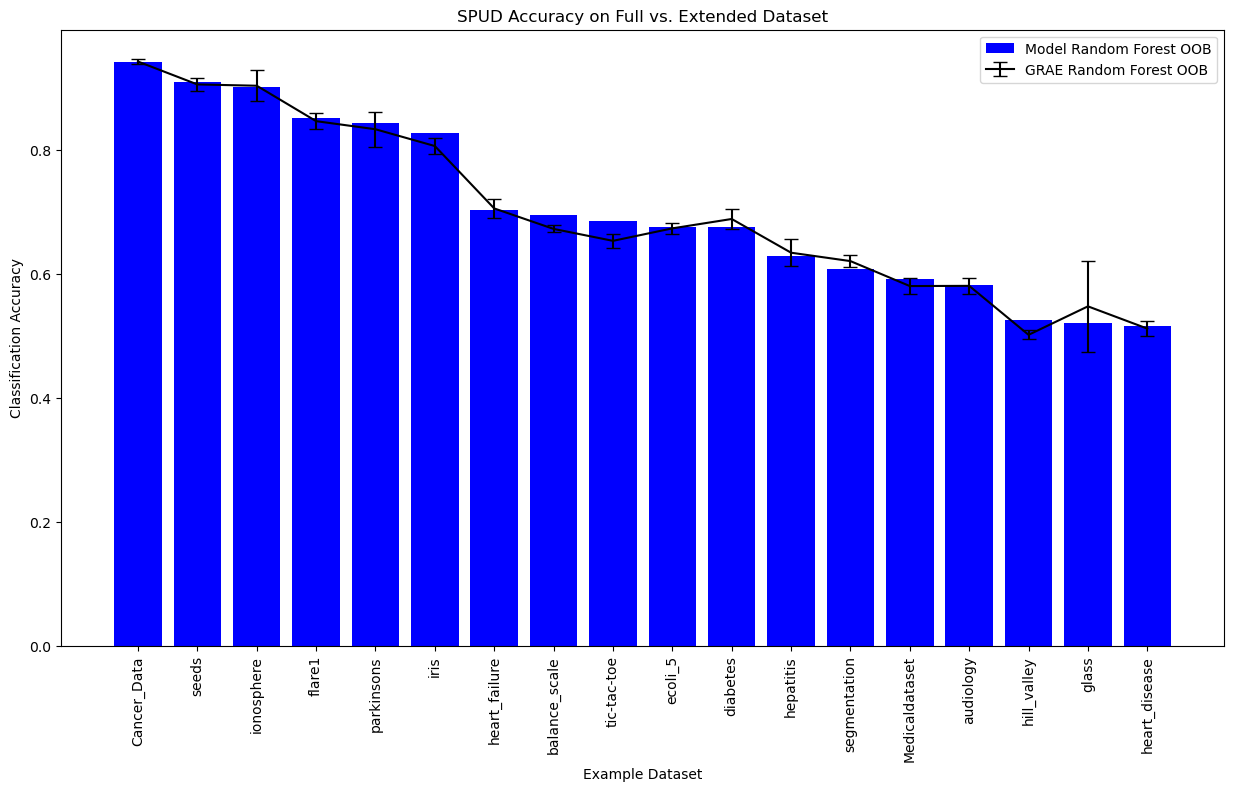

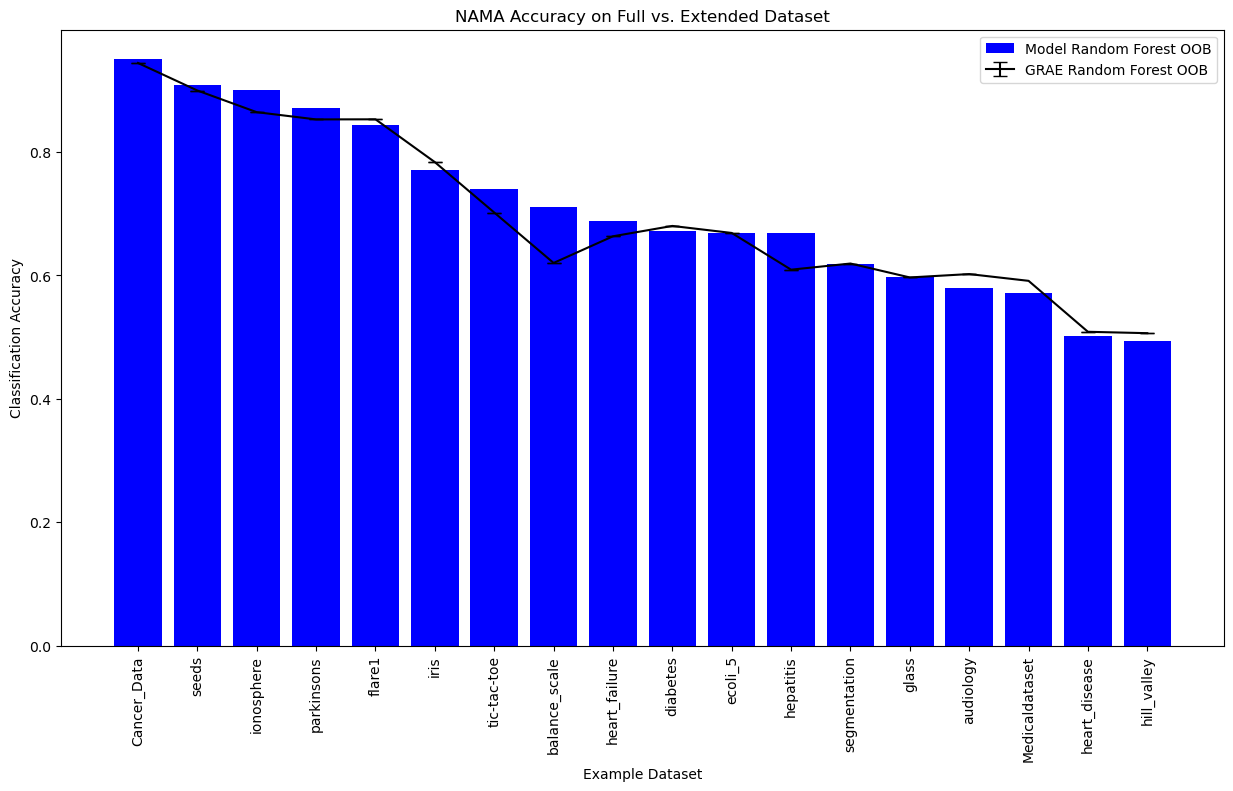

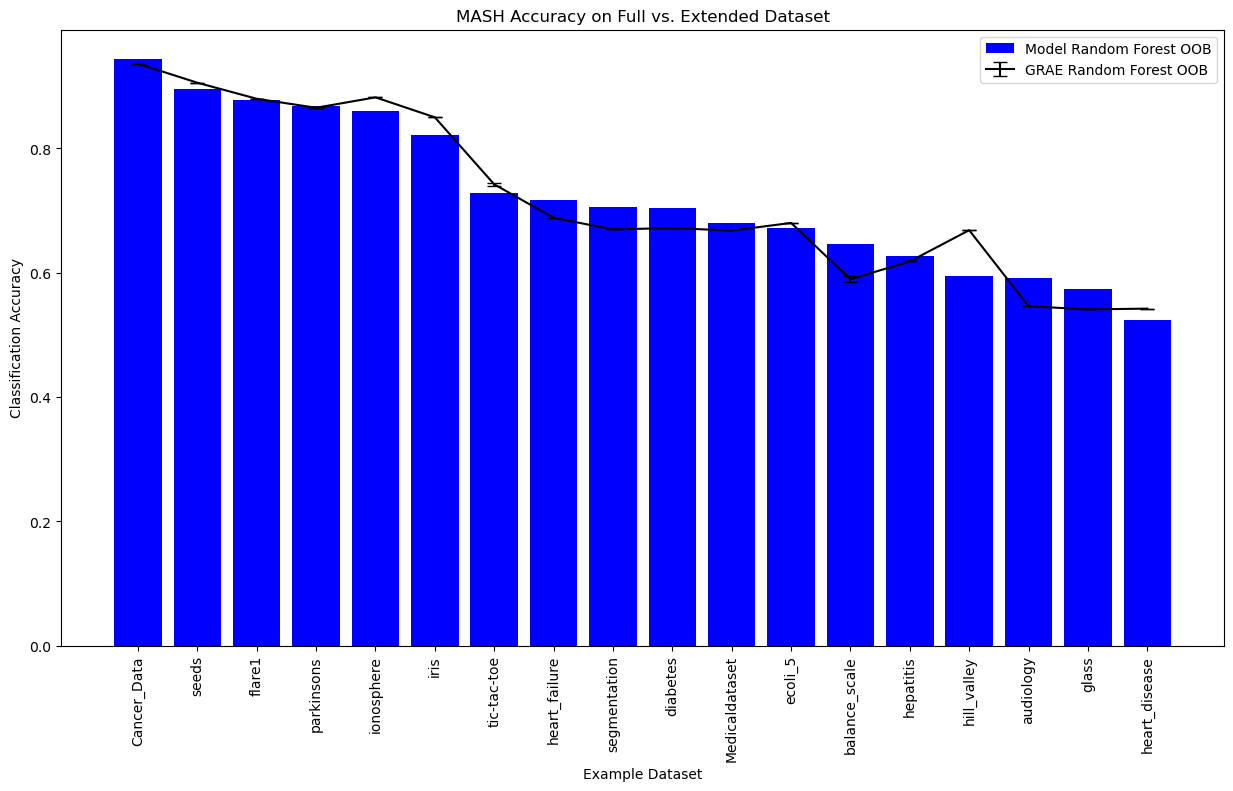

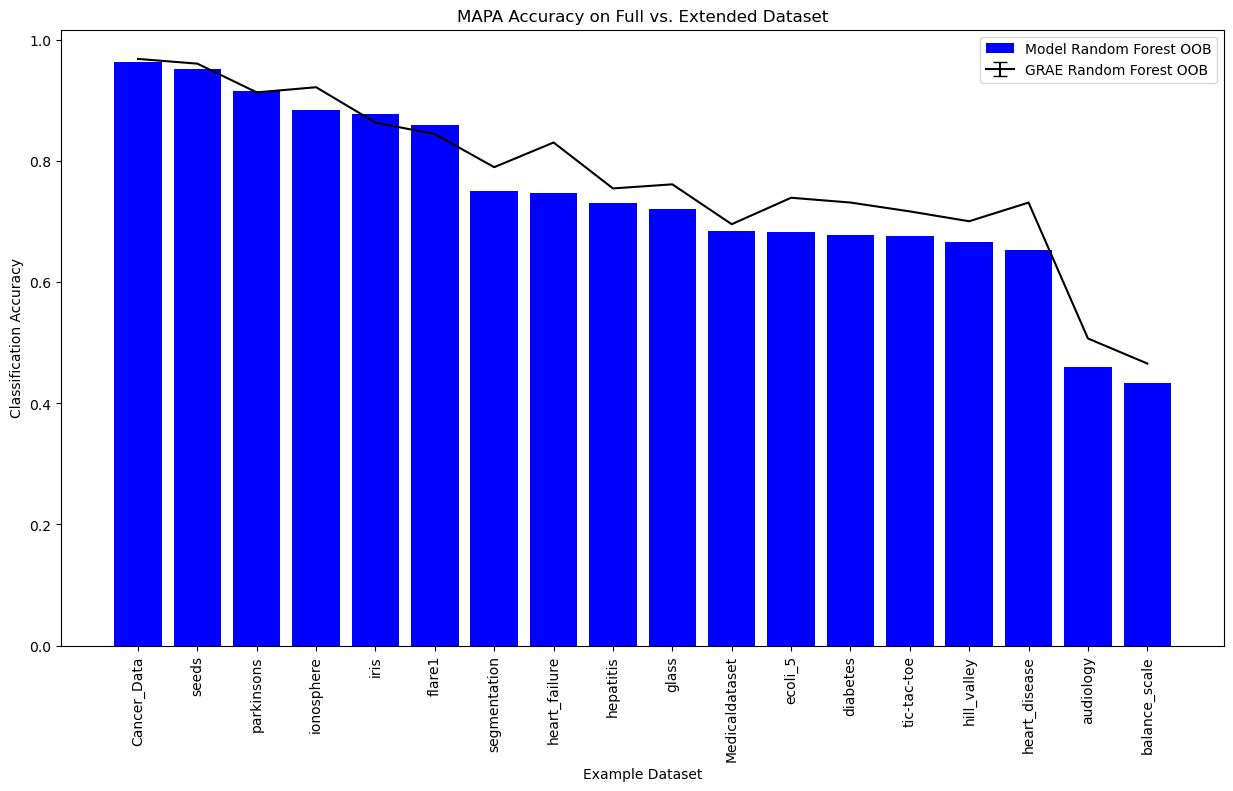

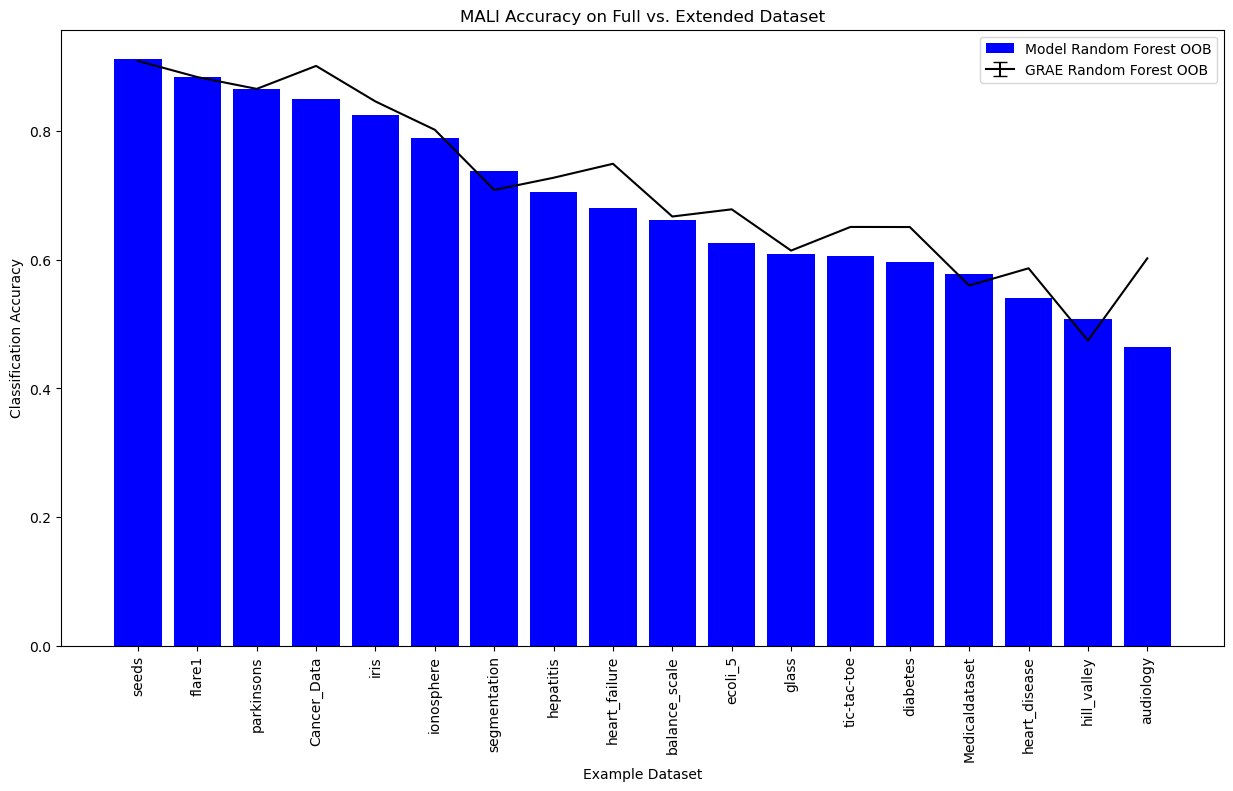

"\nReally the only trouble here is that error bars aren't very meaningful when we're only aggregating across the 5 split types\nAnything else that we do it across is going to be unfair because the score for GRAE is going to follow the score for\nthe model itself and so it'll look like there's a ton of inaccuracy there when it's really that the model's score itself\nis just changing\n"

In [20]:
# Collect the average domain scores and the out of bag scores both with and without GRAE
relavent_models_df = classification_df[~classification_df["method"].isin(['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'MASH-'])]
for method in relavent_models_df["method"].unique():
    mash_random_scores = subset_df(classification_df, method = method, split = "skewed")
    important_scores = mash_random_scores[["csv_file", "Random Forest OOB", "GRAE-RF-OOB"]].copy()
    score_summaries = important_scores.groupby("csv_file").agg(["mean", "std"])
    score_summaries.sort_values(by=("Random Forest OOB", "mean"), ascending=False, inplace=True)

    # Plot the A_Classification_Score for each csv_file
    plt.figure(figsize=(15, 8))
    plt.bar(score_summaries.index, score_summaries["Random Forest OOB"]["mean"], color='blue')
    plt.errorbar(score_summaries.index, score_summaries["GRAE-RF-OOB"]["mean"], yerr=score_summaries["GRAE-RF-OOB"]["std"], 
                color='black', capsize=5)
    plt.title(f'{method} Accuracy on Full vs. Extended Dataset')
    plt.xlabel('Example Dataset')
    plt.ylabel('Classification Accuracy')
    plt.xticks(rotation=90)
    plt.legend(['Model Random Forest OOB', 'GRAE Random Forest OOB'])
    plt.show()

"""
Really the only trouble here is that error bars aren't very meaningful when we're only aggregating across the 5 split types
Anything else that we do it across is going to be unfair because the score for GRAE is going to follow the score for
the model itself and so it'll look like there's a ton of inaccuracy there when it's really that the model's score itself
is just changing
"""

### Story Number Two: How GRAE's Accuracy Changes Acress Models, Datasets, and Split Types

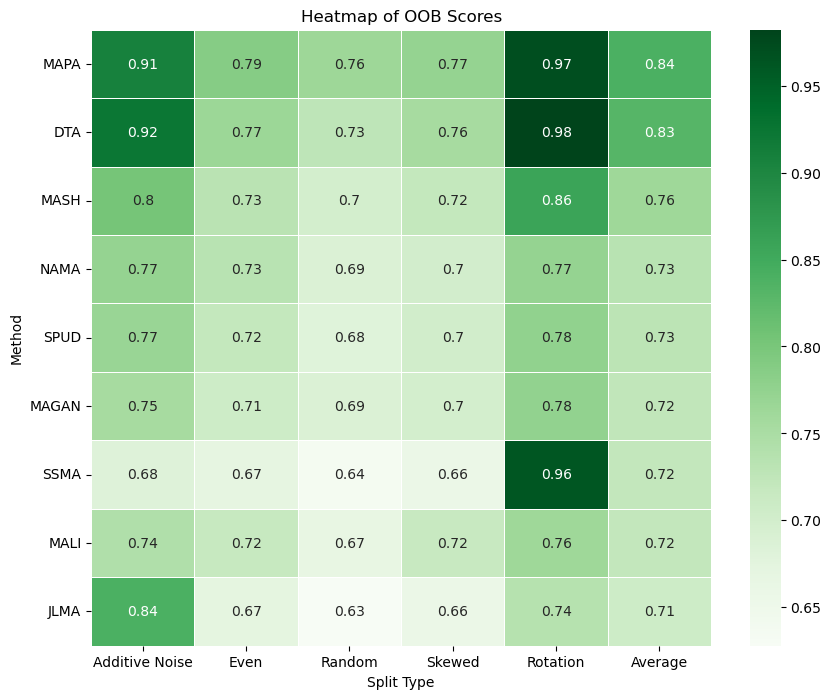

In [21]:
all_scores = subset_df(classification_df)
important_scores = all_scores[["method", "split", "Random Forest OOB", "GRAE-RF-OOB"]].copy()
averaged_scores = important_scores.groupby(["method", "split"]).mean()
grae_heatmap_scores = averaged_scores["GRAE-RF-OOB"].unstack()
#get rid of methods that we don't want to include, for now
grae_heatmap_scores = grae_heatmap_scores[~grae_heatmap_scores.index.isin(['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'MASH-'])]
#create an avarage column and sort by it
grae_heatmap_scores['Average'] = grae_heatmap_scores.mean(axis=1)
grae_heatmap_scores.sort_values(by='Average', ascending=False, inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(grae_heatmap_scores, annot=True, cmap='Greens', linewidths=.5)
plt.title('Heatmap of OOB Scores')
plt.xlabel('Split Type')
plt.xticks(ha="center", ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=["Additive Noise", "Even", "Random", "Skewed", "Rotation", "Average"])
plt.ylabel('Method')
plt.yticks(rotation=0)
plt.show()

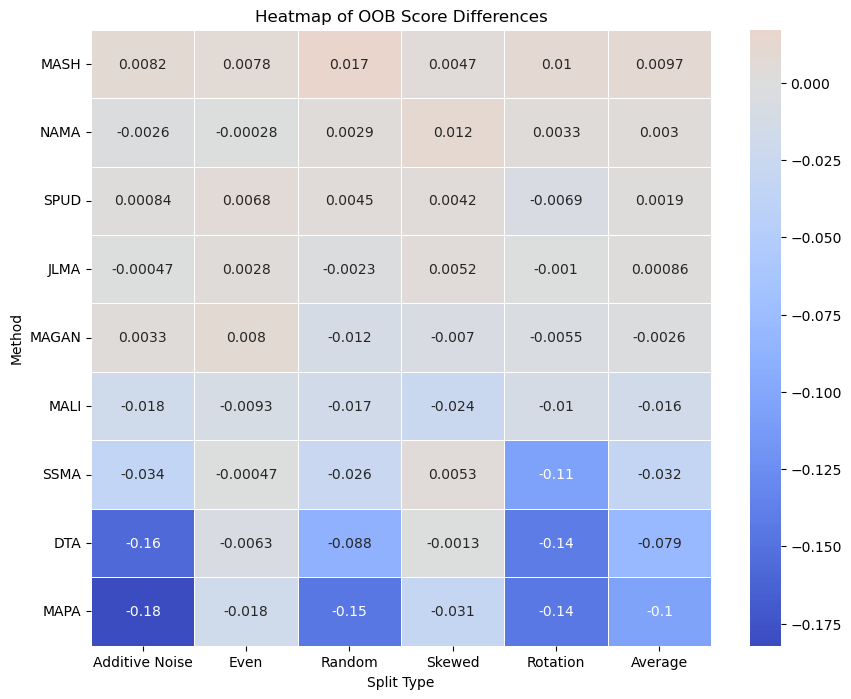

'\nNotice that MASH is the best model to use GRAE on at high accuracies! All of the other really accurate models suffer\nlarge accuracy droms when GRAE is used.\n'

In [22]:
all_scores = subset_df(classification_df)
important_scores = all_scores[["method", "split", "Random Forest OOB", "GRAE-RF-OOB"]].copy()
averaged_scores = important_scores.groupby(["method", "split"]).mean()
model_heatmap_scores = averaged_scores["Random Forest OOB"].unstack()
#get rid of methods that we don't want to include, for now
model_heatmap_scores = model_heatmap_scores[~model_heatmap_scores.index.isin(['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'MASH-'])]
#create an avarage column and sort by it
model_heatmap_scores['Average'] = model_heatmap_scores.mean(axis=1)
model_heatmap_scores.sort_values(by='Average', ascending=False, inplace=True)

difference_heatmap_scores = model_heatmap_scores - grae_heatmap_scores
difference_heatmap_scores.sort_values(by='Average', ascending=False, inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(difference_heatmap_scores, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Heatmap of OOB Score Differences')
plt.xlabel('Split Type')
plt.xticks(ha="center", ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=["Additive Noise", "Even", "Random", "Skewed", "Rotation", "Average"])
plt.ylabel('Method')
plt.yticks(rotation=0)
plt.show()

"""
Notice that MASH is the best model to use GRAE on at high accuracies! All of the other really accurate models suffer
large accuracy droms when GRAE is used.
"""

### Paired Heatmaps
Fig. #: Here we show trends in both the overall accuracy and the relative accuracy for GRAE given different manifold alignment methods and split types. Scores are averages of all test dataset and random seed iterations performed.

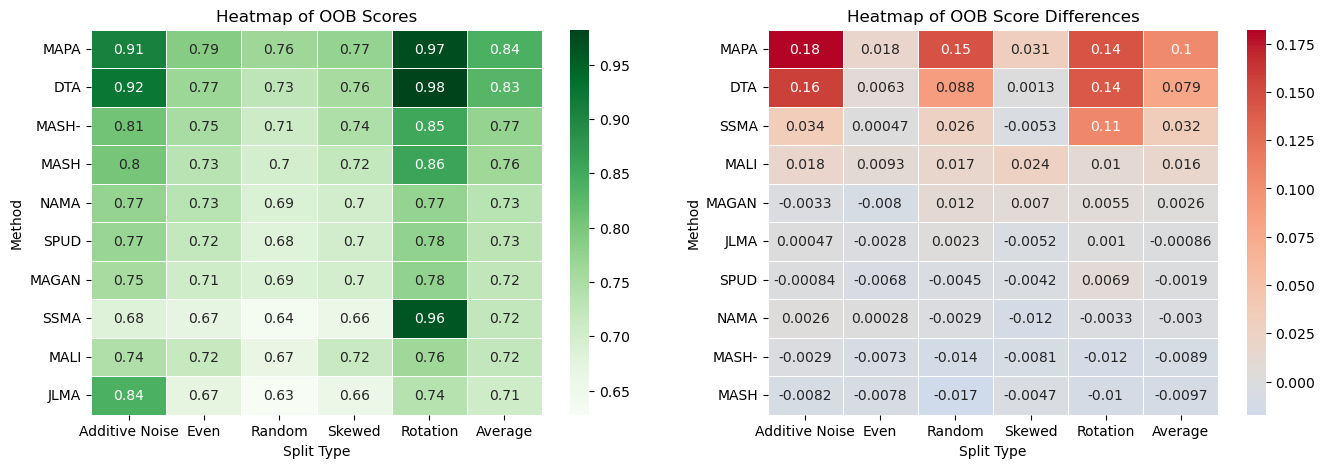

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

all_scores = subset_df(classification_df)
important_scores = all_scores[["method", "split", "Random Forest OOB", "GRAE-RF-OOB"]].dropna().copy()
averaged_scores = important_scores.groupby(["method", "split"]).mean()

#TODO What the heck is up with this?????
model_test_scores = important_scores[["method", "Random Forest OOB", "GRAE-RF-OOB"]].groupby(["method"]).mean()

grae_heatmap_scores = averaged_scores["GRAE-RF-OOB"].unstack()
#get rid of methods that we don't want to include, for now
grae_heatmap_scores = grae_heatmap_scores[~grae_heatmap_scores.index.isin(['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD'])]
#create an avarage column and sort by it
grae_heatmap_scores['Average'] = grae_heatmap_scores.mean(axis=1)
grae_heatmap_scores.sort_values(by='Average', ascending=False, inplace=True)

model_heatmap_scores = averaged_scores["Random Forest OOB"].unstack()
#get rid of methods that we don't want to include, for now
model_heatmap_scores = model_heatmap_scores[~model_heatmap_scores.index.isin(['MALI-RF', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD'])]
#create an avarage column and sort by it
model_heatmap_scores['Average'] = model_heatmap_scores.mean(axis=1)
model_heatmap_scores.sort_values(by='Average', ascending=False, inplace=True)

difference_heatmap_scores = grae_heatmap_scores - model_heatmap_scores
difference_heatmap_scores.sort_values(by='Average', ascending=False, inplace=True)

# Create the heatmaps
sns.heatmap(grae_heatmap_scores, annot=True, cmap='Greens', linewidths=.5, ax=axs[0])
axs[0].set_title('Heatmap of OOB Scores')
axs[0].set_xlabel('Split Type')
axs[0].set_xticks(ha="center", ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=["Additive Noise", "Even", "Random", "Skewed", "Rotation", "Average"])
axs[0].set_ylabel('Method')
axs[0].tick_params(axis='y', rotation=0)

# Create the heatmap
sns.heatmap(difference_heatmap_scores, annot=True, cmap='coolwarm', center=0, linewidths=.5, ax=axs[1])
axs[1].set_title('Heatmap of OOB Score Differences')
axs[1].set_xlabel('Split Type')
axs[1].set_xticks(ha="center", ticks=[0.5,1.5,2.5,3.5,4.5,5.5], labels=["Additive Noise", "Even", "Random", "Skewed", "Rotation", "Average"])
axs[1].set_ylabel('Method')
axs[1].tick_params(axis='y', rotation=0)